In [1]:
cd CreepyPasta

C:\Users\harip\Documents\Uncanny Valley\CreepyPasta


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from textblob import Word
from collections import Counter
import numpy as np

In [4]:
ls

 Volume in drive C has no label.
 Volume Serial Number is F483-228F

 Directory of C:\Users\harip\Documents\Uncanny Valley\CreepyPasta

09/21/2020  01:29 PM    <DIR>          .
09/21/2020  01:29 PM    <DIR>          ..
09/21/2020  01:12 PM            34,820 .DS_Store
06/07/2020  01:36 PM        29,961,841 creepypasta_comments.csv
06/07/2020  01:23 PM               722 RS_2005-06_creepypasta.csv
06/07/2020  01:23 PM               722 RS_2005-07_creepypasta.csv
06/07/2020  01:23 PM               722 RS_2005-08_creepypasta.csv
06/07/2020  01:23 PM               722 RS_2005-09_creepypasta.csv
06/07/2020  01:23 PM               722 RS_2005-10_creepypasta.csv
06/07/2020  01:23 PM               722 RS_2005-11_creepypasta.csv
06/07/2020  01:23 PM               722 RS_2005-12_creepypasta.csv
06/07/2020  01:23 PM               722 RS_2006-01_creepypasta.csv
06/07/2020  01:23 PM               722 RS_2006-02_creepypasta.csv
06/07/2020  01:23 PM               722 RS_2006-03_creepypasta.csv
06/07/20

In [101]:
f = pd.read_csv("RS_2013-09_creepypasta.csv")
df = pd.DataFrame(f)
df.head()

,archived,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_text_color,author_flair_type,brand_safe,can_gild,...,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,suggested_sort,thumbnail,title,url,whitelist_status
0,NaN,scarsmtn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,creepypasta,t5_2rkx4,NaN,NaN,NaN,http://f.thumbs.redditmedia.com/42S6_ugPvJ8iy6...,wont sleep for days after this...,http://www.youtube.com/watch?v=yAa7MlVAzWk&amp...,NaN
1,NaN,Catfacegoddamit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,creepypasta,t5_2rkx4,NaN,NaN,NaN,self,"The ""glitch"" unfinished",http://www.reddit.com/r/creepypasta/comments/1...,NaN
2,NaN,[deleted],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,creepypasta,t5_2rkx4,NaN,NaN,NaN,default,"Aeternae Obruat. Pt 2 ""Missing""",http://i.imgur.com/9VNCQyd.png,NaN
3,NaN,Theultracomputergeek,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,creepypasta,t5_2rkx4,NaN,NaN,NaN,self,Swimming in the deep...,http://www.reddit.com/r/creepypasta/comments/1...,NaN
4,NaN,[deleted],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,creepypasta,t5_2rkx4,NaN,NaN,NaN,default,Meemaw's back,http://video.adultswim.com/promos/the-heart-sh...,NaN


In [121]:
##Creating word dictionaries to group similar words
who = ["creature","zombie","ghost","spirit","monster","demon","doll","voodoo doll","devil","old lady","unhuman","body",
      "clown","witch","body","not human","non human"]
what = ["noise","shadow","darkness","mirror","swing","scream","silence","quiet","rocking chair","light flicker","cry","weep",
       "cackle","stare","watch","footsteps","wail","dead","death","murder","voodoo","crime","noose","kill","creak"]
where = ["cabin","woods","forest","bed","playground","abandoned buildling","hospital","asylum","building","hospital",
        "haunted house"]
when = ["midnight","after dark","3 am","12 am","night shift","storm","rainy","closing","after hours"]
other = ["alone","abandoned","scary","creepy","uncomfortable","strange","abnormal","decomposed","decay"]

creepy_keywords = {'who':who,
           'what':what,
           'where':where,
            'when':when,
            'other':other}

In [5]:
def get_keywords(keywords,passage):
#     print(passage)
#     if(passage==""):
#         return None
    keyword_count = Counter()
    for word in passage.split(" "):
        if word in keywords['who']:
            keyword_count['who'] += 1
        if word in keywords['what']:
            keyword_count['what'] +=1
        if word in keywords['where']:
            keyword_count['where'] +=1
        if word in keywords['when']:
            keyword_count['when'] += 1
        if word in keywords['other']:
            keyword_count['other'] += 1
    return keyword_count

In [6]:
#should only check for posts with text posts and high upvotes
total_keywords=dict()
for i in range(0,len(df)):
    if((df['is_self'][i]==False)|(df['score'][i]<6)):
        pass
    try:
        c = get_keywords(creepy_keywords,df['selftext'][i].replace("\n",""))
        total_keywords.update({df['title'][i]:c})
    except AttributeError:
        pass

In [81]:
total_keywords=dict()
all_posts=[]
for y in range(2006,2019):
    for m in range(1,13):
        if(m<10):
            m="0"+str(m)
        file_name = "RS_"+str(y)+"-"+str(m)+"_creepypasta.csv"
        csv = pd.read_csv(file_name)
        df = pd.DataFrame(csv)
        for i in range(0,len(df)):
            if((df['is_self'][i]==False)|(df['score'][i]<10)):
                continue
            if(df['score'][i]<50):
                continue
            try:
#                 if(df['selftext'][i].isNan()==False):
                all_posts.append(df['selftext'][i])
                c = get_keywords(creepy_keywords,df['selftext'][i].replace("\n",""))
                total_keywords.update({df['title'][i]:c})
            except AttributeError:
                pass

In [12]:
#this function can find the total occurences of words belonging to a certain tag
def find_sum(keywords,tag):
    count = 0
    for key, value in total_keywords.items():
        count+=value[tag]
    return count

In [68]:
print("Total occurences of words in Who list",find_sum(total_keywords,"who"))
print("Total occurences of words in What list",find_sum(total_keywords,"what"))
print("Total occurences of words in When list",find_sum(total_keywords,"when"))
print("Total occurences of words in Where list",find_sum(total_keywords,"where"))
print("Total occurences of words in Other list",find_sum(total_keywords,"other"))

Total occurences of words in Who list 527
Total occurences of words in What list 908
Total occurences of words in When list 61
Total occurences of words in Where list 426
Total occurences of words in Other list 334


In [69]:
print("Density of who words",find_sum(total_keywords,"who")/len(total_keywords))
print("Density of what words",find_sum(total_keywords,"what")/len(total_keywords))
print("Density of when words",find_sum(total_keywords,"when")/len(total_keywords))
print("Density of where words",find_sum(total_keywords,"where")/len(total_keywords))
print("Density of other words",find_sum(total_keywords,"other")/len(total_keywords))

Density of who words 1.1923076923076923
Density of what words 2.0542986425339365
Density of when words 0.13800904977375567
Density of where words 0.9638009049773756
Density of other words 0.755656108597285


## Other analysis 

In [92]:
def remove_punct(text):
    punctuation=[',','.','!','?','(',')','\n','/']
    try:
        text.replace("Nan","")
        for p in punctuation:
            str(text).replace(p,"")
        return text
    except AttributeError:
        return text
processed_posts = []
for i in range(0,len(all_posts)):
#     row = remove_punct(str(df['selftext'][i]))
    try:
        row = remove_punct(all_posts[i])
        row = row.lower()
        processed_posts.append(row)
    except AttributeError:
        pass

In [104]:
ls

 Volume in drive C has no label.
 Volume Serial Number is F483-228F

 Directory of C:\Users\harip\Documents\Uncanny Valley\CreepyPasta

09/21/2020  01:29 PM    <DIR>          .
09/21/2020  01:29 PM    <DIR>          ..
09/21/2020  01:12 PM            34,820 .DS_Store
06/07/2020  01:36 PM        29,961,841 creepypasta_comments.csv
06/07/2020  01:23 PM               722 RS_2005-06_creepypasta.csv
06/07/2020  01:23 PM               722 RS_2005-07_creepypasta.csv
06/07/2020  01:23 PM               722 RS_2005-08_creepypasta.csv
06/07/2020  01:23 PM               722 RS_2005-09_creepypasta.csv
06/07/2020  01:23 PM               722 RS_2005-10_creepypasta.csv
06/07/2020  01:23 PM               722 RS_2005-11_creepypasta.csv
06/07/2020  01:23 PM               722 RS_2005-12_creepypasta.csv
06/07/2020  01:23 PM               722 RS_2006-01_creepypasta.csv
06/07/2020  01:23 PM               722 RS_2006-02_creepypasta.csv
06/07/2020  01:23 PM               722 RS_2006-03_creepypasta.csv
06/07/20

In [112]:
blah = pd.read_csv("RS_2014-03_creepypasta.csv")
df = pd.DataFrame(blah)
df.head()

,archived,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_text_color,author_flair_type,brand_safe,can_gild,...,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,suggested_sort,thumbnail,title,url,whitelist_status
0,True,The_Weaver115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,creepypasta,t5_2rkx4,NaN,NaN,NaN,self,Worst Nightmare,http://www.reddit.com/r/creepypasta/comments/1...,NaN
1,True,staticscreens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,creepypasta,t5_2rkx4,NaN,NaN,NaN,self,Im looking for feedback and what you guys woul...,http://www.reddit.com/r/creepypasta/comments/1...,NaN
2,True,[deleted],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,creepypasta,t5_2rkx4,NaN,NaN,NaN,default,jimmy casket... [venturianTALE] creepy pasta,http://www.reddit.com/r/creepypasta/comments/1...,NaN
3,True,Gamecaptian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,creepypasta,t5_2rkx4,NaN,NaN,NaN,self,"jimmy casket... [venturianTALE] creepy pasta, ...",http://www.reddit.com/r/creepypasta/comments/1...,NaN
4,True,BaileeBloodlust,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,creepypasta,t5_2rkx4,NaN,NaN,NaN,self,Need help finding 2 creepypastas,http://www.reddit.com/r/creepypasta/comments/1...,NaN


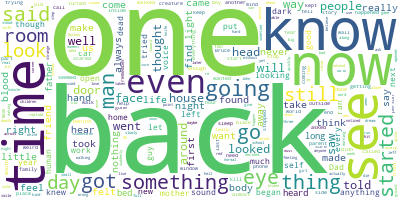

In [113]:
from wordcloud import WordCloud
long_string = ','.join(list(df['selftext'].dropna().values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

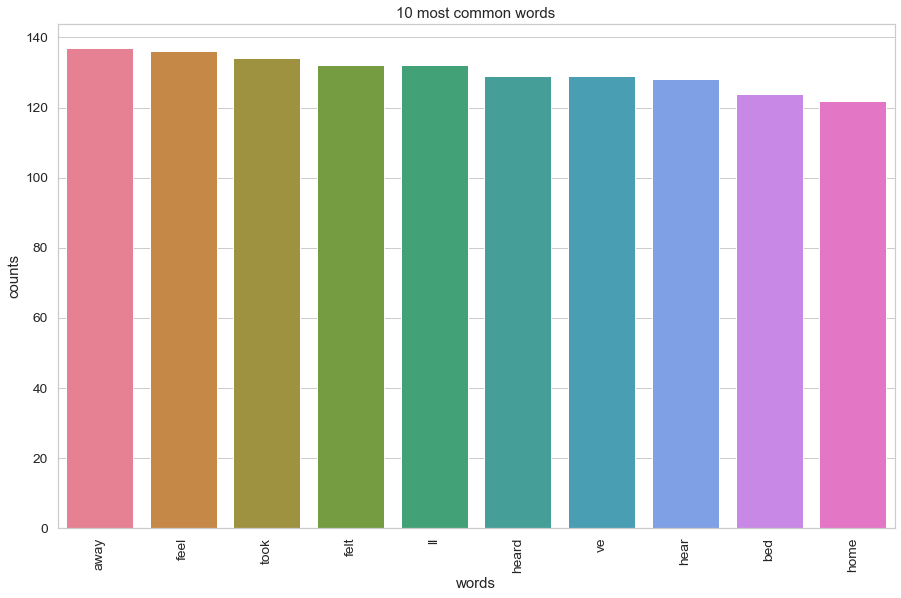

In [126]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[40:50]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['selftext'].dropna())
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [122]:
whoseries = pd.DataFrame(creepy_keywords['who'])

In [124]:
whoseries.head(20)

,0
0,creature
1,zombie
2,ghost
3,spirit
4,monster
5,demon
6,doll
7,voodoo doll
8,devil
9,old lady


In [136]:
for word in who:
    print(word,Word(word).synsets)

creature [Synset('animal.n.01'), Synset('creature.n.02'), Synset('creature.n.03')]
zombie [Synset('zombi.n.03'), Synset('zombi.n.01'), Synset('zombi.n.02'), Synset('automaton.n.01'), Synset('zombie.n.05')]
ghost [Synset('ghost.n.01'), Synset('ghostwriter.n.01'), Synset('ghost.n.03'), Synset('touch.n.03'), Synset('ghost.v.01'), Synset('haunt.v.02'), Synset('ghost.v.03')]
spirit [Synset('spirit.n.01'), Synset('spirit.n.02'), Synset('spirit.n.03'), Synset('spirit.n.04'), Synset('emotional_state.n.01'), Synset('intent.n.02'), Synset('liveliness.n.02'), Synset('heart.n.06'), Synset('spirit.v.01')]
monster [Synset('monster.n.01'), Synset('giant.n.05'), Synset('freak.n.01'), Synset('monster.n.04'), Synset('monster.n.05')]
demon [Synset('devil.n.02'), Synset('monster.n.04'), Synset('demon.n.03')]
doll [Synset('doll.n.01'), Synset('dame.n.01')]
voodoo doll []
devil [Synset('satan.n.01'), Synset('devil.n.02'), Synset('devil.n.03'), Synset('hellion.n.01'), Synset('monster.n.04'), Synset('annoy.v.

In [130]:
Word("creature").synsets

[Synset('animal.n.01'), Synset('creature.n.02'), Synset('creature.n.03')]